# **Processing the Data**

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv("https://www.dropbox.com/s/ng1zijfpsayzseu/pokedex_%28Update_04.21%29_3.csv?dl=1",index_col=0,encoding= 'unicode_escape')

**Drop features that are clearly not needed.**

In [274]:
df = df.drop(labels = ['pokedex_number','name','german_name','japanese_name','generation','species','type_number','abilities_number',
                       'ability_1','ability_2','ability_hidden','base_friendship','percentage_male','egg_type_number','egg_type_2',
                       'against_normal','against_fire','against_water','against_electric','against_grass','against_ice','against_fight',
                       'against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost',
                       'against_dragon','against_dark','against_steel','against_fairy'], axis = 1)
df = df.drop(1033) # remove eternamax because it is a huge outlier

**Preview the distribution of pokemon per type.**

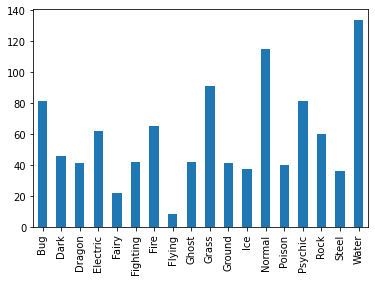

In [275]:
df['type_1'].value_counts().sort_index().plot.bar()

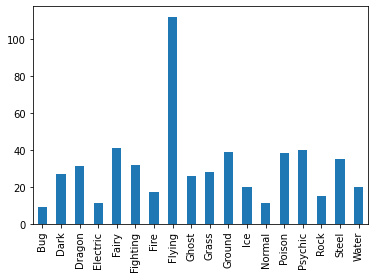

In [276]:
df['type_2'].value_counts().sort_index().plot.bar()

In [277]:
df.describe()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.279598,71.216571,438.696360,69.890805,80.443487,74.502874,72.981801,72.128352,68.749042,92.919540,155.250000,31.393678
std,1.385909,132.259911,120.188908,26.061943,32.430642,30.799182,32.721971,27.568146,30.165066,75.916006,80.077143,30.389722
min,0.100000,0.100000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,36.000000,5.000000
25%,0.600000,9.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,67.000000,20.000000
50%,1.000000,29.500000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,161.000000,20.000000
75%,1.600000,70.500000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,201.500000,25.000000
max,20.000000,999.900000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,255.000000,608.000000,120.000000


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1044 non-null   object 
 1   type_1           1044 non-null   object 
 2   type_2           552 non-null    object 
 3   height_m         1044 non-null   float64
 4   weight_kg        1044 non-null   float64
 5   total_points     1044 non-null   int64  
 6   hp               1044 non-null   int64  
 7   attack           1044 non-null   int64  
 8   defense          1044 non-null   int64  
 9   sp_attack        1044 non-null   int64  
 10  sp_defense       1044 non-null   int64  
 11  speed            1044 non-null   int64  
 12  catch_rate       1044 non-null   int64  
 13  base_experience  1044 non-null   int64  
 14  growth_rate      1044 non-null   object 
 15  egg_type_1       1044 non-null   object 
 16  egg_cycles       1044 non-null   int64  
dtypes: float64(2),

# **Make 3 variations of the dataset: df1, df2, df3**

1.One uses only type_1 and drops type_2<br>2.Second removes all pokemon with a second type<br>3.Third dupes pokemon with two types into two datapoints with the different types (what we did originally) 

**Dataset #1: of only type_1**

In [279]:
df1 = df.drop(labels=['type_2'],axis=1)
df1.info() # 1044 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1044 non-null   object 
 1   type_1           1044 non-null   object 
 2   height_m         1044 non-null   float64
 3   weight_kg        1044 non-null   float64
 4   total_points     1044 non-null   int64  
 5   hp               1044 non-null   int64  
 6   attack           1044 non-null   int64  
 7   defense          1044 non-null   int64  
 8   sp_attack        1044 non-null   int64  
 9   sp_defense       1044 non-null   int64  
 10  speed            1044 non-null   int64  
 11  catch_rate       1044 non-null   int64  
 12  base_experience  1044 non-null   int64  
 13  growth_rate      1044 non-null   object 
 14  egg_type_1       1044 non-null   object 
 15  egg_cycles       1044 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 138.7+ KB


**Dataset #2: remove pokemons with second type**

In [280]:
df2_mask = df['type_2'].isnull()
df2 = df[df2_mask].drop(labels=['type_2'],axis=1) # also remove type_2 column
df2.info() # 492 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 4 to 1041
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           492 non-null    object 
 1   type_1           492 non-null    object 
 2   height_m         492 non-null    float64
 3   weight_kg        492 non-null    float64
 4   total_points     492 non-null    int64  
 5   hp               492 non-null    int64  
 6   attack           492 non-null    int64  
 7   defense          492 non-null    int64  
 8   sp_attack        492 non-null    int64  
 9   sp_defense       492 non-null    int64  
 10  speed            492 non-null    int64  
 11  catch_rate       492 non-null    int64  
 12  base_experience  492 non-null    int64  
 13  growth_rate      492 non-null    object 
 14  egg_type_1       492 non-null    object 
 15  egg_cycles       492 non-null    int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 65.3+ KB


**Dataset #3: dupe pokemons with second type**

In [281]:
without_type2 = df.type_2.isna()
df_withtype2 = df[~without_type2]
df_withtype2 = df_withtype2.drop(labels=['type_1'], axis = 1)
df_withtype2 = df_withtype2.rename({'type_2': 'type_1'}, axis=1)
df3 = pd.concat([df, df_withtype2], ignore_index=True)
df3 = df3.drop(labels=['type_2'], axis = 1)
df3.info() # 1596 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1596 non-null   object 
 1   type_1           1596 non-null   object 
 2   height_m         1596 non-null   float64
 3   weight_kg        1596 non-null   float64
 4   total_points     1596 non-null   int64  
 5   hp               1596 non-null   int64  
 6   attack           1596 non-null   int64  
 7   defense          1596 non-null   int64  
 8   sp_attack        1596 non-null   int64  
 9   sp_defense       1596 non-null   int64  
 10  speed            1596 non-null   int64  
 11  catch_rate       1596 non-null   int64  
 12  base_experience  1596 non-null   int64  
 13  growth_rate      1596 non-null   object 
 14  egg_type_1       1596 non-null   object 
 15  egg_cycles       1596 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 199.6+ KB


**Preview type_1 distribution of pokemon.**

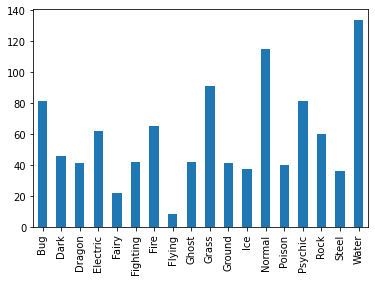

In [282]:
df1['type_1'].value_counts().sort_index().plot.bar()

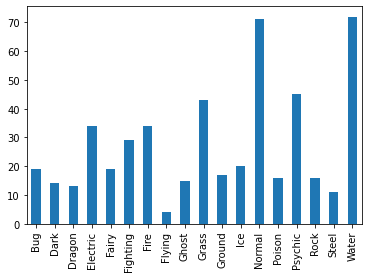

In [283]:
df2['type_1'].value_counts().sort_index().plot.bar()

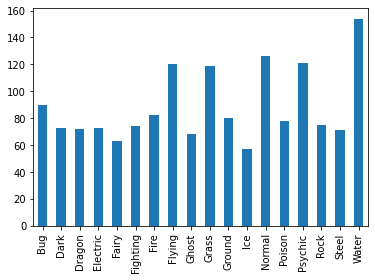

In [284]:
df3['type_1'].value_counts().sort_index().plot.bar()

# **Make 2 versions of each dataset: A (numerical) and B (catergorical)**

There should be 6 datasets total:<br>
df1a, df1b:  dataset #1, 1a is numerical and 1b is categorical<br>
df2a, df2b:  dataset #2, 2a is numerical and 2b is categorical<br>
df3a, df3b:  dataset #3, 3a is numerical and 3b is categorical<br>

**Create the numerical versions of the 3 datasets by converting categorical features to binary via one hot encoding.**

In [285]:
# converting df1 into df1a
df_r_Binary1 = df1.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df1.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df1.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df1a = df1.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df1a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
0,Grass,0.7,6.9,318,45,49,49,65,65,45,45,64,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grass,1.0,13.0,405,60,62,63,80,80,60,45,142,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Grass,2.0,100.0,525,80,82,83,100,100,80,45,236,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Grass,2.4,155.5,625,80,100,123,122,120,80,45,281,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Ice,2.2,800.0,580,100,145,130,65,110,30,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1041,Ghost,2.0,44.5,580,100,65,60,145,80,130,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1042,Psychic,1.1,7.7,500,100,80,80,80,80,80,3,250,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1043,Psychic,2.4,809.1,680,100,165,150,85,130,50,3,340,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [286]:
# converting df2 into df2a
df_r_Binary1 = df2.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)
df_r_Binary2 = df2.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)
df_r_Binary3 = df2.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df2a = df2.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df2a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Fire,1.1,19.0,405,58,64,58,80,65,80,45,142,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Water,0.5,9.0,314,44,48,65,50,64,43,45,63,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10,Water,1.0,22.5,405,59,63,80,65,80,58,45,142,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,Water,1.6,85.5,530,79,83,100,85,105,78,45,239,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Fighting,0.6,12.0,385,60,90,60,53,50,72,3,77,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1038,Electric,1.2,145.0,580,80,100,50,100,50,200,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1039,Dragon,2.1,200.0,580,200,100,50,100,50,80,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1040,Ice,2.2,800.0,580,100,145,130,65,110,30,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [287]:
# converting df3 into df3a
df_r_Binary1 = df3.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)
df_r_Binary2 = df3.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)
df_r_Binary3 = df3.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df3a = df3.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df3a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
0,Grass,0.7,6.9,318,45,49,49,65,65,45,45,64,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grass,1.0,13.0,405,60,62,63,80,80,60,45,142,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Grass,2.0,100.0,525,80,82,83,100,100,80,45,236,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Grass,2.4,155.5,625,80,100,123,122,120,80,45,281,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Water,1.9,105.0,550,100,130,100,63,60,97,3,275,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1592,Grass,1.8,70.0,600,105,120,105,70,95,105,3,300,120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1593,Grass,1.1,7.7,500,100,80,80,80,80,80,3,250,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1594,Ice,2.4,809.1,680,100,165,150,85,130,50,3,340,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


**Create the categorical versions of the 3 datasets by binning numerical values into categorical bins.**

# **DF1B**

**Height:**

In [288]:
def check_outliers(x):
  q25 = x.quantile(.25)
  q75 = x.quantile(.75)
  IQR = q75-q25
  l = q25 - IQR*2
  u = q75 + IQR*2
  return l, u

In [289]:
lower, upper = check_outliers(df1['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.4, upper=3.6


In [290]:
mask_lower = df1['height_m']< lower

In [291]:
mask_upper = df1['height_m']>upper

In [292]:
#let's replace these outliers with upper boundary.
df1['new_height_m']= df1['height_m']
for i in df1[mask_upper].index:
  df1.loc[i,'new_height_m']=upper

In [293]:
df1['height_m_bin_ef'] = pd.qcut(df1['new_height_m'],4)
df1['height_m_bin_ef'].describe()

count             1044
unique               4
top       (0.099, 0.6]
freq               343
Name: height_m_bin_ef, dtype: object

**Weight**

In [294]:
lower, upper = check_outliers(df1['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -114.0, upper=193.5


In [295]:
mask_lower = df1['weight_kg']< lower

In [296]:
mask_upper = df1['weight_kg']>upper

In [297]:
#let's replace these outliers with upper boundary.
df1['new_weight_kg']= df1['weight_kg']
for i in df1[mask_upper].index:
  df1.loc[i,'new_weight_kg']=upper

In [298]:
#EF binning should be best for this one as well bc of the skewed data
df1['weight_kg_bin_ef'] = pd.qcut(df1['new_weight_kg'],4)

**HP**

In [299]:
lower, upper = check_outliers(df1['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -14.0, upper=146.0


In [300]:
mask_lower = df1['hp']< lower

In [301]:
mask_upper = df1['hp']>upper

In [302]:
#let's replace these outliers with upper boundary.
df1['new_hp']= df1['hp']
for i in df1[mask_upper].index:
  df1.loc[i,'new_hp']=upper

In [303]:
#EF binning should be best for this one as well bc of the skewed data
df1['hp_bin_ef'] = pd.qcut(df1['new_hp'],6)

**Attack:**

In [304]:
lower, upper = check_outliers(df1['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -35.0, upper=190.0


In [305]:
mask_lower = df1['attack']< lower

In [306]:
mask_upper = df1['attack']>upper 

In [307]:
#EF binning should be best for this one as well bc of the skewed data
df1['attack_bin_ef'] = pd.qcut(df1['attack'],6)

**Defense**

In [308]:
lower, upper = check_outliers(df1['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=170.0


In [309]:
mask_lower = df1['defense']< lower

In [310]:
mask_upper = df1['defense']>upper

In [311]:
#let's replace these outliers with upper boundary.
df1['new_defense']= df1['defense']
for i in df1[mask_upper].index:
  df1.loc[i,'new_defense']=upper

In [312]:
#EF binning should be best for this one as well bc of the skewed data
df1['defense_bin_ef'] = pd.qcut(df1['new_defense'],6)

**sp_attack**

In [313]:
lower, upper = check_outliers(df1['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=185.0


In [314]:
mask_lower = df1['sp_attack']< lower

In [315]:
mask_upper = df1['sp_attack']>upper

In [316]:
#let's replace these outliers with upper boundary.
df1['new_sp_attack']= df1['sp_attack']
for i in df1[mask_upper].index:
  df1.loc[i,'new_sp_attack']=upper

In [317]:
#EF binning should be best for this one as well bc of the skewed data
df1['sp_attack_bin_ef'] = pd.qcut(df1['new_sp_attack'],6)

**sp_defense**

In [318]:
lower, upper = check_outliers(df1['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=170.0


In [319]:
mask_lower = df1['sp_defense']< lower

In [320]:
mask_upper = df1['sp_defense']>upper

In [321]:
#let's replace these outliers with upper boundary.
df1['new_sp_defense']= df1['sp_defense']
for i in df1[mask_upper].index:
  df1.loc[i,'new_sp_defense']=upper

In [322]:
#EF binning should be best for this one as well bc of the skewed data
df1['sp_defense_bin_ef'] = pd.qcut(df1['new_sp_defense'],6)

**speed**

In [323]:
lower, upper = check_outliers(df1['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -45.0, upper=180.0


In [324]:
mask_lower = df1['speed']< lower

In [325]:
mask_upper = df1['speed']>upper

In [326]:
#let's replace these outliers with upper boundary.
df1['new_speed']= df1['speed']
for i in df1[mask_upper].index:
  df1.loc[i,'new_speed']=upper

In [327]:
#EF binning should be best for this one as well bc of the skewed data
df1['speed_bin_ef'] = pd.qcut(df1['new_speed'],6)

**total_points**

In [328]:
lower, upper = check_outliers(df1['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=885.0


In [329]:
mask_lower = df1['total_points']< lower

In [330]:
mask_upper = df1['total_points']>upper

In [331]:
#EF binning should be best for this one as well bc of the skewed data
df1['total_points_bin_ef'] = pd.qcut(df1['total_points'],6)

**catch_rate**

In [332]:
lower, upper = check_outliers(df1['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -119.0, upper=291.0


In [333]:
mask_lower = df1['catch_rate']< lower

In [334]:
mask_upper = df1['catch_rate']>upper

In [335]:
#EF binning should be best for this one as well bc of the skewed data
df1['catch_rate_bin_ef'] = pd.qcut(df1['catch_rate'],4)

**base_experience**

In [336]:
lower, upper = check_outliers(df1['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -202.0, upper=470.5


In [337]:
mask_lower = df1['base_experience']< lower

In [338]:
mask_upper = df1['base_experience']>upper

In [339]:
#let's replace these outliers with upper boundary.
df1['new_base_experience']= df1['base_experience']
for i in df1[mask_upper].index:
  df1.loc[i,'new_base_experience']=upper

In [340]:
#EF binning should be best for this one as well bc of the skewed data
df1['base_experience_bin_ef'] = pd.qcut(df1['new_base_experience'],6)

**egg_cycles**

In [341]:
lower, upper = check_outliers(df1['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [342]:
mask_lower = df1['egg_cycles']< lower

In [343]:
mask_upper = df1['egg_cycles']>upper

In [344]:
#let's replace these outliers with upper boundary.
df1['new_egg_cycles']= df1['egg_cycles']
for i in df1[mask_upper].index:
  df1.loc[i,'new_egg_cycles']=upper
for i in df1[mask_lower].index:
  df1.loc[i,'new_egg_cycles']=lower

In [345]:
df1['egg_cycles_bin_ew'] = pd.cut(df1['new_egg_cycles'],3)

**removing unneeded columns**

In [346]:
df1b = df1.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles', 'new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)

In [347]:
df1b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
0,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(0.099, 9.0]","(0.999, 45.0]","(4.999, 50.0]","(45.0, 60.0]","(55.0, 65.0]","(56.0, 70.0]","(39.833, 50.0]","(305.0, 384.0]","(2.999, 45.0]","(62.0, 123.667]","(18.333, 26.667]"
1,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(9.0, 29.5]","(59.667, 68.0]","(50.0, 65.0]","(60.0, 70.0]","(65.0, 85.0]","(70.0, 80.0]","(50.0, 65.0]","(384.0, 458.0]","(2.999, 45.0]","(123.667, 161.0]","(18.333, 26.667]"
2,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(70.5, 193.5]","(75.0, 91.167]","(77.0, 92.0]","(70.0, 85.0]","(85.0, 105.0]","(80.0, 100.0]","(65.0, 80.333]","(495.0, 540.0]","(2.999, 45.0]","(175.0, 240.0]","(18.333, 26.667]"
3,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(70.5, 193.5]","(75.0, 91.167]","(92.0, 113.0]","(100.0, 170.0]","(105.0, 185.0]","(100.0, 170.0]","(65.0, 80.333]","(540.0, 780.0]","(2.999, 45.0]","(240.0, 470.5]","(18.333, 26.667]"
4,Normal,Fire,Medium Slow,Dragon,"(0.099, 0.6]","(0.099, 9.0]","(0.999, 45.0]","(50.0, 65.0]","(4.999, 45.0]","(55.0, 65.0]","(45.0, 56.0]","(50.0, 65.0]","(305.0, 384.0]","(2.999, 45.0]","(35.999, 62.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Sub Legendary,Ice,Slow,Undiscovered,"(1.6, 3.6]","(70.5, 193.5]","(91.167, 146.0]","(113.0, 190.0]","(100.0, 170.0]","(55.0, 65.0]","(100.0, 170.0]","(4.999, 39.833]","(540.0, 780.0]","(2.999, 45.0]","(240.0, 470.5]","(26.667, 35.0]"
1041,Sub Legendary,Ghost,Slow,Undiscovered,"(1.6, 3.6]","(29.5, 70.5]","(91.167, 146.0]","(50.0, 65.0]","(45.0, 60.0]","(105.0, 185.0]","(70.0, 80.0]","(100.0, 180.0]","(540.0, 780.0]","(2.999, 45.0]","(240.0, 470.5]","(26.667, 35.0]"
1042,Legendary,Psychic,Slow,Undiscovered,"(1.0, 1.6]","(0.099, 9.0]","(91.167, 146.0]","(77.0, 92.0]","(70.0, 85.0]","(65.0, 85.0]","(70.0, 80.0]","(65.0, 80.333]","(495.0, 540.0]","(2.999, 45.0]","(240.0, 470.5]","(26.667, 35.0]"
1043,Legendary,Psychic,Slow,Undiscovered,"(1.6, 3.6]","(70.5, 193.5]","(91.167, 146.0]","(113.0, 190.0]","(100.0, 170.0]","(65.0, 85.0]","(100.0, 170.0]","(39.833, 50.0]","(540.0, 780.0]","(2.999, 45.0]","(240.0, 470.5]","(26.667, 35.0]"


# **DF2B**

**Height:**

In [348]:
lower, upper = check_outliers(df2['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.2999999999999998, upper=3.1999999999999997


In [349]:
mask_lower = df2['height_m']< lower

In [350]:
mask_upper = df2['height_m']>upper

In [351]:
#let's replace these outliers with upper boundary.
df2['new_height_m']= df2['height_m']
for i in df2[mask_upper].index:
  df2.loc[i,'new_height_m']=upper

In [352]:
df2['height_m_bin_ef'] = pd.qcut(df2['new_height_m'],4)

**Weight**

In [353]:
lower, upper = check_outliers(df2['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -82.325, upper=143.425


In [354]:
mask_lower = df2['weight_kg']< lower

In [355]:
mask_upper = df2['weight_kg']>upper

In [356]:
#let's replace these outliers with upper boundary.
df2['new_weight_kg']= df2['weight_kg']
for i in df2[mask_upper].index:
  df2.loc[i,'new_weight_kg']=upper

In [357]:
#EF binning should be best for this one as well bc of the skewed data
df2['weight_kg_bin_ef'] = pd.qcut(df2['new_weight_kg'],4)

**HP**

In [358]:
lower, upper = check_outliers(df2['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -8.0, upper=137.0


In [359]:
mask_lower = df2['hp']< lower

In [360]:
mask_upper = df2['hp']>upper 

In [361]:
#let's replace these outliers with upper boundary.
df2['new_hp']= df2['hp']
for i in df2[mask_upper].index:
  df2.loc[i,'new_hp']=upper

In [362]:
#EF binning should be best for this one as well bc of the skewed data
df2['hp_bin_ef'] = pd.qcut(df2['new_hp'],6)

**Attack:**

In [363]:
lower, upper = check_outliers(df2['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -32.0, upper=180.5


In [364]:
mask_lower = df2['attack']< lower

In [365]:
mask_upper = df2['attack']>upper

In [366]:
#EF binning should be best for this one as well bc of the skewed data
df2['attack_bin_ef'] = pd.qcut(df2['attack'],6)

**Defense**

In [367]:
lower, upper = check_outliers(df2['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -11.0, upper=141.5


In [368]:
mask_lower = df2['defense']< lower

In [369]:
mask_upper = df2['defense']>upper

In [370]:
#let's replace these outliers with upper boundary.
df2['new_defense']= df2['defense']
for i in df2[mask_upper].index:
  df2.loc[i,'new_defense']=upper

In [371]:
#EF binning should be best for this one as well bc of the skewed data
df2['defense_bin_ef'] = pd.qcut(df2['new_defense'],6)

**sp_attack**

In [372]:
lower, upper = check_outliers(df2['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -35.0, upper=165.0


In [373]:
mask_lower = df2['sp_attack']< lower

In [374]:
mask_upper = df2['sp_attack']>upper

In [375]:
#let's replace these outliers with upper boundary.
df2['new_sp_attack']= df2['sp_attack']
for i in df2[mask_upper].index:
  df2.loc[i,'new_sp_attack']=upper

In [376]:
#EF binning should be best for this one as well bc of the skewed data
df2['sp_attack_bin_ef'] = pd.qcut(df2['new_sp_attack'],6)

**sp_defense**

In [377]:
lower, upper = check_outliers(df2['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -20.75, upper=155.5


In [378]:
mask_lower = df2['sp_defense']< lower

In [379]:
mask_upper = df2['sp_defense']>upper

In [380]:
#let's replace these outliers with upper boundary.
df2['new_sp_defense']= df2['sp_defense']
for i in df2[mask_upper].index:
  df2.loc[i,'new_sp_defense']=upper

In [381]:
#EF binning should be best for this one as well bc of the skewed data
df2['sp_defense_bin_ef'] = pd.qcut(df2['new_sp_defense'],6)

**speed**

In [382]:
lower, upper = check_outliers(df2['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -36.75, upper=167.0


In [383]:
mask_lower = df2['speed']< lower

In [384]:
mask_upper = df2['speed']>upper

In [385]:
#let's replace these outliers with upper boundary.
df2['new_speed']= df2['speed']
for i in df2[mask_upper].index:
  df2.loc[i,'new_speed']=upper

In [386]:
#EF binning should be best for this one as well bc of the skewed data
df2['speed_bin_ef'] = pd.qcut(df2['new_speed'],6)

**total_points**

In [387]:
lower, upper = check_outliers(df2['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -60.0, upper=865.0


In [388]:
mask_lower = df2['total_points']< lower

In [389]:
mask_upper = df2['total_points']>upper

In [390]:
#EF binning should be best for this one as well bc of the skewed data
df2['total_points_bin_ef'] = pd.qcut(df2['total_points'],6)

**catch_rate**

In [391]:
lower, upper = check_outliers(df2['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -245.0, upper=480.0


In [392]:
mask_lower = df2['catch_rate']< lower

In [393]:
mask_upper = df2['catch_rate']>upper

In [394]:
#EF binning should be best for this one as well bc of the skewed data
df2['catch_rate_bin_ef'] = pd.qcut(df2['catch_rate'],4)

**base_experience**

In [395]:
lower, upper = check_outliers(df2['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -161.0, upper=399.0


In [396]:
mask_lower = df2['base_experience']< lower

In [397]:
mask_upper = df2['base_experience']>upper

In [398]:
#let's replace these outliers with upper boundary.
df2['new_base_experience']= df2['base_experience']
for i in df2[mask_upper].index:
  df2.loc[i,'new_base_experience']=upper

In [399]:
#EF binning should be best for this one as well bc of the skewed data
df2['base_experience_bin_ef'] = pd.qcut(df2['new_base_experience'],6)

**egg_cycles**

In [400]:
lower, upper = check_outliers(df2['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [401]:
mask_lower = df2['egg_cycles']< lower

In [402]:
mask_upper = df2['egg_cycles']>upper

In [403]:
#let's replace these outliers with upper boundary.
df2['new_egg_cycles']= df2['egg_cycles']
for i in df2[mask_upper].index:
  df2.loc[i,'new_egg_cycles']=upper
for i in df2[mask_lower].index:
  df2.loc[i,'new_egg_cycles']=lower

In [404]:
df2['egg_cycles_bin_ew'] = pd.cut(df2['new_egg_cycles'],3)

**removing unneeded columns**

In [405]:
df2 = df2.drop(labels=['new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)
df2b = df2.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles'], axis = 1)

In [406]:
df2b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
4,Normal,Fire,Medium Slow,Dragon,"(0.5, 0.8]","(7.975, 23.4]","(9.999, 45.0]","(46.833, 60.0]","(42.833, 55.0]","(50.0, 62.0]","(41.833, 53.0]","(63.0, 78.0]","(295.0, 330.0]","(2.999, 45.0]","(60.0, 68.667]","(18.333, 26.667]"
5,Normal,Fire,Medium Slow,Dragon,"(0.8, 1.4]","(7.975, 23.4]","(55.0, 65.0]","(60.0, 71.5]","(55.0, 64.0]","(75.0, 95.0]","(63.0, 75.0]","(78.0, 95.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(18.333, 26.667]"
9,Normal,Water,Medium Slow,Monster,"(0.099, 0.5]","(7.975, 23.4]","(9.999, 45.0]","(46.833, 60.0]","(64.0, 75.0]","(40.0, 50.0]","(63.0, 75.0]","(35.0, 50.0]","(295.0, 330.0]","(2.999, 45.0]","(60.0, 68.667]","(18.333, 26.667]"
10,Normal,Water,Medium Slow,Monster,"(0.8, 1.4]","(7.975, 23.4]","(55.0, 65.0]","(60.0, 71.5]","(75.0, 95.0]","(62.0, 75.0]","(75.0, 90.0]","(50.0, 63.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(18.333, 26.667]"
11,Normal,Water,Medium Slow,Monster,"(1.4, 3.2]","(53.125, 143.425]","(73.333, 88.333]","(71.5, 85.0]","(95.0, 141.5]","(75.0, 95.0]","(90.0, 155.5]","(63.0, 78.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Sub Legendary,Fighting,Slow,Undiscovered,"(0.5, 0.8]","(7.975, 23.4]","(55.0, 65.0]","(85.0, 105.0]","(55.0, 64.0]","(50.0, 62.0]","(41.833, 53.0]","(63.0, 78.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(26.667, 35.0]"
1038,Sub Legendary,Electric,Slow,Undiscovered,"(0.8, 1.4]","(53.125, 143.425]","(73.333, 88.333]","(85.0, 105.0]","(42.833, 55.0]","(95.0, 165.0]","(41.833, 53.0]","(95.0, 167.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"
1039,Sub Legendary,Dragon,Slow,Undiscovered,"(1.4, 3.2]","(53.125, 143.425]","(88.333, 137.0]","(85.0, 105.0]","(42.833, 55.0]","(95.0, 165.0]","(41.833, 53.0]","(78.0, 95.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"
1040,Sub Legendary,Ice,Slow,Undiscovered,"(1.4, 3.2]","(53.125, 143.425]","(88.333, 137.0]","(105.0, 180.0]","(95.0, 141.5]","(62.0, 75.0]","(90.0, 155.5]","(4.999, 35.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"


# **DF3B**

**Height:**

In [407]:
lower, upper = check_outliers(df3['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.4, upper=3.6


In [408]:
mask_lower = df3['height_m']< lower

In [409]:
mask_upper = df3['height_m']>upper

In [410]:
#let's replace these outliers with upper boundary.
df3['new_height_m']= df3['height_m']
for i in df3[mask_upper].index:
  df3.loc[i,'new_height_m']=upper

In [411]:
df3['height_m_bin_ef'] = pd.qcut(df3['new_height_m'],4)

**Weight**

In [412]:
lower, upper = check_outliers(df3['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -127.6, upper=215.14999999999998


In [413]:
mask_lower = df3['weight_kg']< lower

In [414]:
mask_upper = df3['weight_kg']>upper

In [415]:
#let's replace these outliers with upper boundary.
df3['new_weight_kg']= df3['weight_kg']
for i in df3[mask_upper].index:
  df3.loc[i,'new_weight_kg']=upper

In [416]:
#EF binning should be best for this one as well bc of the skewed data
df3['weight_kg_bin_ef'] = pd.qcut(df3['new_weight_kg'],4)

**HP**

In [417]:
lower, upper = check_outliers(df3['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -8.75, upper=147.5


In [418]:
mask_lower = df3['hp']< lower

In [419]:
mask_upper = df3['hp']>upper

In [420]:
#let's replace these outliers with upper boundary.
df3['new_hp']= df3['hp']
for i in df3[mask_upper].index:
  df3.loc[i,'new_hp']=upper

In [421]:
#EF binning should be best for this one as well bc of the skewed data
df3['hp_bin_ef'] = pd.qcut(df3['new_hp'],6)

**Attack:**

In [422]:
lower, upper = check_outliers(df3['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -23.0, upper=182.0


In [423]:
mask_lower = df3['attack']< lower

In [424]:
mask_upper = df3['attack']>upper

In [425]:
#EF binning should be best for this one as well bc of the skewed data
df3['attack_bin_ef'] = pd.qcut(df3['attack'],6)

**Defense**

In [426]:
lower, upper = check_outliers(df3['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -28.0, upper=177.0


In [427]:
mask_lower = df3['defense']< lower

In [428]:
mask_upper = df3['defense']>upper

In [429]:
#let's replace these outliers with upper boundary.
df3['new_defense']= df3['defense']
for i in df3[mask_upper].index:
  df3.loc[i,'new_defense']=upper

In [430]:
#EF binning should be best for this one as well bc of the skewed data
df3['defense_bin_ef'] = pd.qcut(df3['new_defense'],6)

**sp_attack**

In [431]:
lower, upper = check_outliers(df3['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=185.0


In [432]:
mask_lower = df3['sp_attack']< lower

In [433]:
mask_upper = df3['sp_attack']>upper

In [434]:
#let's replace these outliers with upper boundary.
df3['new_sp_attack']= df3['sp_attack']
for i in df3[mask_upper].index:
  df3.loc[i,'new_sp_attack']=upper

In [435]:
#EF binning should be best for this one as well bc of the skewed data
df3['sp_attack_bin_ef'] = pd.qcut(df3['new_sp_attack'],6)

**sp_defense**

In [436]:
lower, upper = check_outliers(df3['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -21.0, upper=164.0


In [437]:
mask_lower = df3['sp_defense']< lower

In [438]:
mask_upper = df3['sp_defense']>upper

In [439]:
#let's replace these outliers with upper boundary.
df3['new_sp_defense']= df3['sp_defense']
for i in df3[mask_upper].index:
  df3.loc[i,'new_sp_defense']=upper

In [440]:
#EF binning should be best for this one as well bc of the skewed data
df3['sp_defense_bin_ef'] = pd.qcut(df3['new_sp_defense'],6)

**speed**

In [441]:
lower, upper = check_outliers(df3['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -47.0, upper=183.0


In [442]:
mask_lower = df3['speed']< lower

In [443]:
mask_upper = df3['speed']>upper

In [444]:
#let's replace these outliers with upper boundary.
df3['new_speed']= df3['speed']
for i in df3[mask_upper].index:
  df3.loc[i,'new_speed']=upper

In [445]:
#EF binning should be best for this one as well bc of the skewed data
df3['speed_bin_ef'] = pd.qcut(df3['new_speed'],6)

**total_points**

In [446]:
lower, upper = check_outliers(df3['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -20.0, upper=880.0


In [447]:
mask_lower = df3['total_points']< lower

In [448]:
mask_upper = df3['total_points']>upper

In [449]:
#EF binning should be best for this one as well bc of the skewed data
df3['total_points_bin_ef'] = pd.qcut(df3['total_points'],6)

**catch_rate**

In [450]:
lower, upper = check_outliers(df3['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -105.0, upper=270.0


In [451]:
mask_lower = df3['catch_rate']< lower

In [452]:
mask_upper = df3['catch_rate']>upper

In [453]:
#EF binning should be best for this one as well bc of the skewed data
df3['catch_rate_bin_ef'] = pd.qcut(df3['catch_rate'],4)

**base_experience**

In [454]:
lower, upper = check_outliers(df3['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -223.0, upper=512.0


In [455]:
mask_lower = df3['base_experience']< lower

In [456]:
mask_upper = df3['base_experience']>upper

In [457]:
#let's replace these outliers with upper boundary.
df3['new_base_experience']= df3['base_experience']
for i in df3[mask_upper].index:
  df3.loc[i,'new_base_experience']=upper

In [458]:
#EF binning should be best for this one as well bc of the skewed data
df3['base_experience_bin_ef'] = pd.qcut(df3['new_base_experience'],6)

**egg_cycles**

In [459]:
lower, upper = check_outliers(df3['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [460]:
mask_lower = df3['egg_cycles']< lower

In [461]:
mask_upper = df3['egg_cycles']>upper

In [462]:
#let's replace these outliers with upper boundary.
df3['new_egg_cycles']= df3['egg_cycles']
for i in df3[mask_upper].index:
  df3.loc[i,'new_egg_cycles']=upper
for i in df3[mask_lower].index:
  df3.loc[i,'new_egg_cycles']=lower

In [463]:
df3['egg_cycles_bin_ew'] = pd.cut(df3['new_egg_cycles'],3)

**removing unneeded columns**

In [464]:
df3 = df3.drop(labels=['new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)
df3b = df3.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles'], axis = 1)

In [465]:
df3b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
0,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(0.099, 9.5]","(0.999, 48.0]","(4.999, 50.0]","(48.0, 60.0]","(55.0, 70.0]","(60.0, 70.0]","(40.0, 55.0]","(309.0, 400.0]","(2.999, 45.0]","(62.0, 137.0]","(18.333, 26.667]"
1,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(9.5, 31.5]","(48.0, 60.0]","(50.0, 65.0]","(60.0, 70.0]","(70.0, 85.0]","(70.0, 85.0]","(55.0, 68.0]","(400.0, 470.0]","(2.999, 45.0]","(137.0, 165.0]","(18.333, 26.667]"
2,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(78.05, 215.15]","(78.0, 95.0]","(80.0, 95.0]","(70.0, 85.0]","(85.0, 105.0]","(85.0, 100.0]","(68.0, 84.0]","(500.0, 570.0]","(2.999, 45.0]","(179.0, 248.333]","(18.333, 26.667]"
3,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(78.05, 215.15]","(78.0, 95.0]","(95.0, 115.0]","(105.0, 177.0]","(105.0, 185.0]","(100.0, 164.0]","(68.0, 84.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(18.333, 26.667]"
4,Normal,Fire,Medium Slow,Dragon,"(0.099, 0.6]","(0.099, 9.5]","(0.999, 48.0]","(50.0, 65.0]","(4.999, 48.0]","(55.0, 70.0]","(45.0, 60.0]","(55.0, 68.0]","(174.999, 309.0]","(2.999, 45.0]","(35.999, 62.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Sub Legendary,Water,Slow,Undiscovered,"(1.6, 3.6]","(78.05, 215.15]","(95.0, 147.5]","(115.0, 190.0]","(85.0, 105.0]","(55.0, 70.0]","(45.0, 60.0]","(84.0, 100.0]","(500.0, 570.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1592,Mythical,Grass,Slow,Undiscovered,"(1.6, 3.6]","(31.5, 78.05]","(95.0, 147.5]","(115.0, 190.0]","(85.0, 105.0]","(55.0, 70.0]","(85.0, 100.0]","(100.0, 183.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1593,Legendary,Grass,Slow,Undiscovered,"(1.0, 1.6]","(0.099, 9.5]","(95.0, 147.5]","(65.0, 80.0]","(70.0, 85.0]","(70.0, 85.0]","(70.0, 85.0]","(68.0, 84.0]","(470.0, 500.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1594,Legendary,Ice,Slow,Undiscovered,"(1.6, 3.6]","(78.05, 215.15]","(95.0, 147.5]","(115.0, 190.0]","(105.0, 177.0]","(70.0, 85.0]","(100.0, 164.0]","(40.0, 55.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"


# **Decision Tree**

In [466]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.externals import joblib
from sklearn.tree import export_graphviz
import graphviz

### Process data set for tree training

In [467]:
#this takes out the class label (type_1) from dataset x
x1a = df1a.iloc[:, 1:38]  
x2a = df2a.iloc[:, 1:38]
x3a = df3a.iloc[:, 1:38]

In [468]:
x3b = df3b.iloc[:,2:16]

In [469]:
#create dictionaries for each data set
pokemon1a = {}
pokemon1a['feature_names_1a'] = x1a.columns.values

pokemon2a = {}
pokemon2a['feature_names_2a'] = x2a.columns.values

pokemon3a = {}
pokemon3a['feature_names_3a'] = x3a.columns.values

In [470]:
pokemon3b = {}
pokemon3b['feature_names_3b'] = x3b.columns.values

In [471]:
pokemon1a['data_1a'] = x1a.values
pokemon2a['data_2a'] = x2a.values
pokemon3a['data_3a'] = x3a.values


In [472]:
pokemon3b['data_3b'] = x3b.values

In [473]:
#create y data set = class label
y1a = df1a.iloc[:,0:1]
y1a

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1040,Ice
1041,Ghost
1042,Psychic
1043,Psychic


In [474]:
y2a = df2a.iloc[:,0:1]
y2a

,type_1
4,Fire
5,Fire
9,Water
10,Water
11,Water
...,...
1034,Fighting
1038,Electric
1039,Dragon
1040,Ice


In [475]:
y3a = df3a.iloc[:,0:1]
y3a

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1591,Water
1592,Grass
1593,Grass
1594,Ice


In [476]:
y3b = df3b.iloc[:,1:2]
y3b

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1591,Water
1592,Grass
1593,Grass
1594,Ice


In [477]:
# set target_names 
pokemon1a['target_names_1a'] = y1a['type_1'].unique()
pokemon1a['target_names_1a']   #shows class label


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [478]:
pokemon2a['target_names_2a'] = y2a['type_1'].unique()
pokemon2a['target_names_2a']

array(['Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground',
       'Fairy', 'Ice', 'Dark', 'Steel', 'Fighting', 'Psychic', 'Grass',
       'Dragon', 'Rock', 'Ghost', 'Flying'], dtype=object)

In [479]:
pokemon3a['target_names_3a'] = y3a['type_1'].unique()
pokemon3a['target_names_3a']

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [480]:
pokemon3b['target_names_3b'] = y3b['type_1'].unique()

In [481]:
#shows class label for each row
pokemon1a['target_1a'] = y1a['type_1'].values
pokemon2a['target_2a'] = y2a['type_1'].values
pokemon3a['target_3a'] = y3a['type_1'].values

In [482]:
#pokemon3b['target_3b'] = y3b['type_1'].values()

In [483]:
#split datasets into training and testing parts 
x1a_train, x1a_test, y1a_train, y1a_test = train_test_split( pokemon1a['data_1a'], pokemon1a['target_1a'],
                                                    test_size=0.2, random_state=1,
                                                    stratify = pokemon1a['target_1a'])

x2a_train, x2a_test, y2a_train, y2a_test = train_test_split( pokemon2a['data_2a'], pokemon2a['target_2a'],
                                                    test_size=0.3, random_state=1,
                                                    stratify = pokemon2a['target_2a'])

x3a_train, x3a_test, y3a_train, y3a_test = train_test_split( pokemon3a['data_3a'], pokemon3a['target_3a'],
                                                    test_size=0.3, random_state=1,
                                                    stratify = pokemon3a['target_3a'])

In [484]:
#x3b_train, x3b_test, y3b_train, y3b_test = train_test_split( pokemon3b['data_3b'], pokemon3b['target_3b'],
                                                    #test_size=0.3, random_state=1,
                                                    #stratify = pokemon3b['target_3b'])

In [485]:
x1a_train.shape, y1a_train.shape, x1a_test.shape, y1a_test.shape    #730 train, 314 test, 37 columns for x

((835, 37), (835,), (209, 37), (209,))

# Build Decision Tree

Split Method 

1st round of building - Original Trees with no limits

df1

In [486]:
#fit data
tree1a_entropy = DecisionTreeClassifier(criterion='entropy')
tree1a_entropy.fit(x1a_train, y1a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [487]:
dot_data = export_graphviz(tree1a_entropy, out_file = None,
                          feature_names = pokemon1a['feature_names_1a'],
                          class_names = pokemon1a['target_names_1a'],
                          filled=True)
#draw graph
graph_1a_original = graphviz.Source(dot_data)
#graph

In [488]:
#find out which features are most important = egg_cycles
tree1a_entropy.feature_importances_

array([0.02990152, 0.05106922, 0.01969654, 0.06896857, 0.0662078 ,
       0.04975082, 0.08790085, 0.04558632, 0.06060051, 0.03492274,
       0.01476269, 0.11513311, 0.        , 0.00253828, 0.        ,
       0.        , 0.04133132, 0.0820561 , 0.        , 0.01941837,
       0.02145385, 0.02363874, 0.01494998, 0.03130071, 0.01827237,
       0.02531668, 0.        , 0.00297356, 0.        , 0.        ,
       0.00098664, 0.00147604, 0.00765831, 0.00208873, 0.0272414 ,
       0.02587113, 0.00692713])

In [489]:
#evaluate tree performance with test dataset - mean accuracy
original_tree1a_score = tree1a_entropy.score(x1a_test, y1a_test)
original_tree1a_score

0.48325358851674644

2nd Round of building - set limits for # tree leaves and depth - df1

In [490]:
#to avoid overfitting - use max_depth=3, min_samples_leaf = 5 as an initial tree depth to get a feel


#1a
tree1a_entropy_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')
tree1a_entropy_3.fit(x1a_train, y1a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [491]:
dot_data= export_graphviz(tree1a_entropy_3, out_file=None,
                         feature_names = pokemon1a['feature_names_1a'],
                         class_names = pokemon1a['target_names_1a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_1a_3 = graphviz.Source(dot_data)
#graph

In [492]:
depth3_tree1a_score = tree1a_entropy_3.score(x1a_test, y1a_test)
depth3_tree1a_score

0.28708133971291866

In [493]:
#depth of 3 caused accuracy to go down, so try another setting
tree1a_entropy_5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, criterion='entropy')
tree1a_entropy_5.fit(x1a_train, y1a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [494]:
dot_data= export_graphviz(tree1a_entropy_5, out_file=None,
                         feature_names = pokemon1a['feature_names_1a'],
                         class_names = pokemon1a['target_names_1a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_1a_5 = graphviz.Source(dot_data)
#graph

In [495]:
depth5_tree1a_score = tree1a_entropy_5.score(x1a_test, y1a_test)
depth5_tree1a_score

0.3492822966507177

In [496]:
#depth of 5 caused accuracy to increase, so increase a little more
tree1a_entropy_7 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, criterion='entropy')
tree1a_entropy_7.fit(x1a_train, y1a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [497]:
dot_data= export_graphviz(tree1a_entropy_7, out_file=None,
                         feature_names = pokemon1a['feature_names_1a'],
                         class_names = pokemon1a['target_names_1a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_1a_7 = graphviz.Source(dot_data)
#graph

In [498]:
depth7_tree1a_score = tree1a_entropy_7.score(x1a_test, y1a_test)
depth7_tree1a_score

0.41148325358851673

In [499]:
print(f"original tree 1a score = {original_tree1a_score} with depth as {tree1a_entropy.tree_.max_depth}\n\
depth three tree 1a score = {depth3_tree1a_score}\n\
depth five tree 1a score = {depth5_tree1a_score}\n\
depth seven tree 1a score = {depth7_tree1a_score}")

original tree 1a score = 0.48325358851674644 with depth as 17
depth three tree 1a score = 0.28708133971291866
depth five tree 1a score = 0.3492822966507177
depth seven tree 1a score = 0.41148325358851673


**with depth seven, there is about the same accuracy as original with much less depth (makes it easier to visualize), so we will go with this tree for df1a**

1st round of building for df2

In [500]:
tree2a_entropy = DecisionTreeClassifier(criterion='entropy')
tree2a_entropy.fit(x2a_train, y2a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [501]:

dot_data = export_graphviz(tree2a_entropy, out_file = None,
                          feature_names = pokemon2a['feature_names_2a'],
                          class_names = pokemon2a['target_names_2a'],
                          filled=True)
#draw graph
graph_2a_original = graphviz.Source(dot_data)
#graph

In [502]:
original_tree2a_score = tree2a_entropy.score(x2a_test, y2a_test)
original_tree2a_score

0.39864864864864863

Second round of building df2

In [503]:
tree2a_entropy_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')
tree2a_entropy_3.fit(x2a_train, y2a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [504]:
dot_data= export_graphviz(tree2a_entropy_3, out_file=None,
                         feature_names = pokemon2a['feature_names_2a'],
                         class_names = pokemon2a['target_names_2a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_2a_3 = graphviz.Source(dot_data)
#graph

In [505]:
depth3_tree2a_score = tree2a_entropy_3.score(x2a_test, y2a_test)
depth3_tree2a_score

0.28378378378378377

In [506]:
#score dropped, so increase depth
tree2a_entropy_8 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, criterion='entropy')
tree2a_entropy_8.fit(x2a_train, y2a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [507]:
dot_data= export_graphviz(tree2a_entropy_8, out_file=None,
                         feature_names = pokemon2a['feature_names_2a'],
                         class_names = pokemon2a['target_names_2a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_2a_8  = graphviz.Source(dot_data)

In [508]:
depth8_tree2a_score = tree2a_entropy_8.score(x2a_test, y2a_test)
depth8_tree2a_score

0.39864864864864863

In [509]:
print(f"original tree 2a score = {original_tree2a_score} with depth as {tree2a_entropy.tree_.max_depth}\n\
depth three tree 2a score = {depth3_tree2a_score}\n\
depth eight tree 2a score = {depth8_tree2a_score}")

original tree 2a score = 0.39864864864864863 with depth as 16
depth three tree 2a score = 0.28378378378378377
depth eight tree 2a score = 0.39864864864864863


**with depth eight, there is better accuracy than original with much less depth (makes it easier to visualize), so we will go with this tree for df2a**

1st round of building for df3

In [510]:
tree3a_entropy = DecisionTreeClassifier(criterion='entropy')
tree3a_entropy.fit(x3a_train, y3a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [511]:

dot_data = export_graphviz(tree3a_entropy, out_file = None,
                          feature_names = pokemon3a['feature_names_3a'],
                          class_names = pokemon3a['target_names_3a'],
                          filled=True)
#draw graph
graph_3a_original = graphviz.Source(dot_data)
#graph

In [512]:
original_tree3a_score = tree3a_entropy.score(x3a_test, y3a_test)
original_tree3a_score

0.15031315240083507

2nd round of building for df3

In [513]:
tree3a_entropy_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')
tree3a_entropy_3.fit(x3a_train, y3a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [514]:
dot_data= export_graphviz(tree3a_entropy_3, out_file=None,
                         feature_names = pokemon3a['feature_names_3a'],
                         class_names = pokemon3a['target_names_3a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_3a_entropy3 = graphviz.Source(dot_data)
#graph

In [515]:
depth3_tree3a_score = tree3a_entropy_3.score(x3a_test, y3a_test)
depth3_tree3a_score

0.20876826722338204

In [516]:
#score increased, so increase again to see if goes up
tree3a_entropy_6 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, criterion='entropy')
tree3a_entropy_6.fit(x3a_train, y3a_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [517]:
dot_data= export_graphviz(tree3a_entropy_6, out_file=None,
                         feature_names = pokemon3a['feature_names_3a'],
                         class_names = pokemon3a['target_names_3a'],
                         filled=True, rounded=True,
                         special_characters=True)

graph_3a_entropy6 = graphviz.Source(dot_data)
#graph

In [518]:
depth6_tree3a_score = tree3a_entropy_6.score(x3a_test, y3a_test)
depth6_tree3a_score

0.2588726513569937

In [519]:
print(f"original tree 3a score = {original_tree3a_score} with depth as {tree3a_entropy.tree_.max_depth}\n\
depth three tree 3a score = {depth3_tree3a_score}\n\
depth six tree 2a score = {depth6_tree3a_score}")

original tree 3a score = 0.15031315240083507 with depth as 20
depth three tree 3a score = 0.20876826722338204
depth six tree 2a score = 0.2588726513569937


**with depth six, there is better accuracy than original with much less depth (makes it easier to visualize), so we will go with this tree for df3a**

## Use Tree to Predict Class Label 

In [520]:
#predict which class


y1a_predict= tree1a_entropy_7.predict(x1a_test)
y1a_predict_p = tree1a_entropy_7.predict_proba(x1a_test)
test_df1a = pd.DataFrame(x1a_test, columns=pokemon1a['feature_names_1a'])
test_df1a['type_1']=y1a_test
test_df1a['pre']=y1a_predict
test_df1a['error']=np.where(test_df1a['type_1']!=test_df1a['pre'],1,0)#mark error cases
p1a = pd.DataFrame(y1a_predict_p, index=test_df1a.index, columns = tree1a_entropy_7.classes_)


test_df1a=test_df1a.join(p1a)


for i in test_df1a.index:
    c = test_df1a.loc[i, 'pre']
    test_df1a.loc[i,'p_score']=test_df1a.loc[i,c]

test_df1a.head()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow,type_1,pre,error,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,p_score
0,1.0,40.5,360.0,84.0,71.0,43.0,71.0,43.0,48.0,120.0,126.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal,Fire,1,0.0,0.050633,0.000000,0.075949,0.000000,0.012658,0.303797,0.0,0.000000,0.050633,0.012658,0.063291,0.101266,0.012658,0.113924,0.000000,0.000000,0.202532,0.303797
1,2.4,53.6,680.0,100.0,85.0,80.0,165.0,100.0,150.0,3.0,340.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Psychic,Psychic,0,0.0,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.0,0.052632,0.105263,0.000000,0.000000,0.052632,0.000000,0.421053,0.052632,0.105263,0.105263,0.421053
2,2.3,150.0,505.0,90.0,100.0,90.0,90.0,80.0,55.0,45.0,177.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Electric,Water,1,0.0,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.384615,0.000000,0.000000,0.000000,0.000000,0.461538,0.461538
3,1.9,205.0,580.0,80.0,75.0,150.0,75.0,150.0,50.0,3.0,261.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Steel,Steel,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.230769,0.538462,0.000000,0.538462
4,0.4,1.2,348.0,90.0,50.0,34.0,60.0,44.0,70.0,125.0,70.0,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Ghost,Fire,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.000000,0.200000,0.200000


In [521]:
#accuracy tests
from sklearn.metrics import confusion_matrix
confusion_matrix(y1a_test, y1a_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  1,  0,  0,  0,  3,  0,  0,  0,  0,  0,  3,  0,  0,  0,
         0,  2],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  1,  1,  0,  5,  0,  0,  0,  0,  0,  3,  0,  0,  0,
         1,  2],
       [ 0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
         1,  4],
       [ 0,  0,  1,  1,  0,  0,  5,  0,  0,  0,  0,  0,  2,  0,  1,  0,
         0,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2],
       [ 0,  0,  1,  0,  0,  0,  3,  0,  4,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  0,  2,  0,  1,  0,  0, 12,  0,  0,  1,  0,  1,  1,
         0,  0],
       [ 3,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,
         0,  0],
       [ 0,  0,  0,  

In [522]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
p0 = precision_score(y1a_test, y1a_predict, labels=[0],average='micro')
p1 = precision_score(y1a_test,y1a_predict,labels=[1],average='micro')
p2 = precision_score(y1a_test,y1a_predict,labels=[2],average='micro')

print(f"class 0 precision = {p0}\n\
class 1 precision = {p1}\n\
class 3 precision = {p2}")

class 0 precision = 0.0
class 1 precision = 0.0
class 3 precision = 0.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [523]:
a0= accuracy_score(y1a_test,y1a_predict, normalize=True)

print(f"overall accuracy = {a0}")

overall accuracy = 0.41148325358851673


In [524]:
r0= recall_score(y1a_test,y1a_predict, labels=[0],average='micro')
r1 = recall_score(y1a_test,y1a_predict, labels=[1],average='micro')
r2 = recall_score(y1a_test, y1a_predict, labels=[2], average='micro')
print(f"class 0 recall = {r0}\n\
class 1 recall = {r1}\n\
class 2 recall = {r2}")

class 0 recall = 0.0
class 1 recall = 0.0
class 2 recall = 0.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [525]:
y2a_predict= tree2a_entropy_8.predict(x2a_test)
y2a_predict_p = tree2a_entropy_8.predict_proba(x2a_test)
test_df2a = pd.DataFrame(x2a_test, columns=pokemon2a['feature_names_2a'])
test_df2a['type_1']=y2a_test
test_df2a['pre']=y2a_predict
test_df2a['error']=np.where(test_df2a['type_1']!=test_df2a['pre'],1,0)#mark error cases
p2a = pd.DataFrame(y2a_predict_p, index=test_df2a.index, columns = tree2a_entropy_8.classes_)

test_df2a = test_df2a.join(p2a)

for i in test_df2a.index:
    c = test_df2a.loc[i, 'pre']
    test_df2a.loc[i,'p_score']=test_df2a.loc[i,c]

test_df2a.head(20)

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow,type_1,pre,error,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,p_score
0,0.3,7.0,314.0,41.0,56.0,40.0,62.0,44.0,71.0,45.0,63.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Water,Water,0,0.0,0.000000,0.0,0.071429,0.107143,0.017857,0.000000,0.035714,0.000000,0.035714,0.035714,0.053571,0.107143,0.000000,0.035714,0.017857,0.000000,0.482143,0.482143
1,1.3,60.0,475.0,55.0,130.0,115.0,50.0,50.0,75.0,60.0,166.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Water,Water,0,0.0,0.000000,0.0,0.071429,0.107143,0.017857,0.000000,0.035714,0.000000,0.035714,0.035714,0.053571,0.107143,0.000000,0.035714,0.017857,0.000000,0.482143,0.482143
2,0.6,8.0,348.0,67.0,82.0,62.0,46.0,48.0,43.0,220.0,70.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fighting,Normal,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.000000,0.000000,0.166667,0.000000,0.833333
3,0.2,0.9,371.0,54.0,45.0,47.0,75.0,98.0,52.0,120.0,130.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy,Water,1,0.0,0.000000,0.0,0.071429,0.107143,0.017857,0.000000,0.035714,0.000000,0.035714,0.035714,0.053571,0.107143,0.000000,0.035714,0.017857,0.000000,0.482143,0.482143
4,0.3,1.0,290.0,45.0,30.0,40.0,105.0,50.0,20.0,200.0,58.0,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psychic,Ghost,1,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.076923,0.000000,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154
5,1.1,10.0,552.0,78.0,65.0,68.0,112.0,154.0,75.0,45.0,248.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy,Water,1,0.0,0.000000,0.0,0.071429,0.107143,0.017857,0.000000,0.035714,0.000000,0.035714,0.035714,0.053571,0.107143,0.000000,0.035714,0.017857,0.000000,0.482143,0.482143
6,0.7,18.0,390.0,60.0,45.0,70.0,75.0,85.0,55.0,100.0,137.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psychic,Psychic,0,0.0,0.000000,0.0,0.250000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.000000,0.000000,0.000000,0.625000
7,0.6,12.5,305.0,75.0,80.0,55.0,25.0,35.0,35.0,180.0,61.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Fighting,Fighting,0,0.0,0.000000,0.0,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.600000
8,0.5,33.5,330.0,90.0,60.0,60.0,40.0,40.0,40.0,120.0,66.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ground,Fire,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333
9,0.2,0.3,275.0,35.0,55.0,40.0,45.0,40.0,60.0,190.0,55.0,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Electric,Ghost,1,0.0,0.000000,0.0,0.000000,0.076

In [526]:
y3a_predict= tree3a_entropy_6.predict(x3a_test)
y3a_predict_p = tree3a_entropy_6.predict_proba(x3a_test)
test_df3a = pd.DataFrame(x3a_test, columns=pokemon3a['feature_names_3a'])
test_df3a['type_1']=y3a_test
test_df3a['pre']=y3a_predict
test_df3a['error']=np.where(test_df3a['type_1']!=test_df3a['pre'],1,0)#mark error cases
p3a = pd.DataFrame(y3a_predict_p, index=test_df3a.index, columns = tree3a_entropy_6.classes_)

test_df3a = test_df3a.join(p3a)

for i in test_df3a.index:
    c = test_df3a.loc[i, 'pre']
    test_df3a.loc[i,'p_score']=test_df3a.loc[i,c]

test_df3a.head()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow,type_1,pre,error,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,p_score
0,1.0,10.8,265.0,40.0,20.0,30.0,40.0,80.0,55.0,255.0,53.0,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Bug,Poison,1,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.571429
1,2.5,920.0,500.0,100.0,125.0,100.0,55.0,85.0,35.0,60.0,175.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ground,Ground,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,0.300000,0.000000,0.100000,0.400000
2,1.0,35.0,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,173.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Water,Psychic,1,0.020833,0.036458,0.098958,0.020833,0.020833,0.036458,0.026042,0.078125,0.052083,0.041667,0.036458,0.041667,0.057292,0.010417,0.145833,0.109375,0.093750,0.072917,0.145833
3,1.1,110.5,420.0,65.0,95.0,100.0,60.0,50.0,50.0,45.0,147.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dragon,Dragon,0,0.000000,0.076923,0.653846,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.076923,0.038462,0.000000,0.653846
4,0.6,11.2,280.0,30.0,40.0,55.0,40.0,55.0,60.0,180.0,56.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fighting,Water,1,0.002710,0.040650,0.000000,0.084011,0.092141,0.067751,0.029810,0.018970,0.100271,0.043360,0.046070,0.029810,0.032520,0.065041,0.102981,0.048780,0.046070,0.149051,0.149051


# Build with 10 fold cross validation 

In [527]:
#perform cross validation
tree1a_entropy_cross = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')
scores = cross_val_score(tree1a_entropy_cross, pokemon1a['data_1a'], pokemon1a['target_1a'], cv=10, scoring='accuracy')
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.24761905, 0.25714286, 0.25714286, 0.2952381 , 0.25      ,
       0.22115385, 0.29807692, 0.23076923, 0.27884615, 0.21153846])

In [528]:
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.25 (+/- 0.06)


In [529]:
#fit model to whole data set and show tree

tree1a_entropy_cross.fit(pokemon1a['data_1a'], pokemon1a['target_1a'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [530]:
dot_data= export_graphviz(tree1a_entropy_cross, out_file=None,
                         feature_names = pokemon1a['feature_names_1a'],
                         class_names = pokemon1a['target_names_1a'],
                         filled=True, rounded=True,
                         special_characters=True)
graph_1a_cross = graphviz.Source(dot_data)
#graph.render('Pokemon_entropy_cross')
#graph

In [531]:
#score
tree1a_entropy_cross.score(x1a_test, y1a_test)

0.31100478468899523

In [532]:
#prediction
y1a_train_pred = cross_val_predict(tree1a_entropy_cross, pokemon1a['data_1a'], pokemon1a['target_1a'], cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [533]:
p0 = precision_score(pokemon1a['target_1a'], y1a_train_pred, labels=[0],average='micro')
p1 = precision_score(pokemon1a['target_1a'], y1a_train_pred,labels=[1],average='micro')
p2 = precision_score(pokemon1a['target_1a'], y1a_train_pred,labels=[2],average='micro', zero_division='warn')

print(f"class 0 precision = {p0}\n\
class 1 precision = {p1}\n\
class 3 precision = {p2}")

class 0 precision = 0.0
class 1 precision = 0.0
class 3 precision = 0.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Build with Gini Tree

build for df1

In [534]:
#Gini function is used. 
tree1a_gini = DecisionTreeClassifier() #default criterion is gini
tree1a_gini.fit(pokemon1a['data_1a'], pokemon1a['target_1a'])

dot_data = export_graphviz(tree1a_gini, out_file=None, 
                          feature_names = pokemon1a['feature_names_1a'],
                         class_names = pokemon1a['target_names_1a'],
                          filled=True)
graph = graphviz.Source(dot_data)
#graph

In [535]:
#evaluate tree performance with test dataset - mean accuracy
tree1a_gini.score(x1a_test, y1a_test)

1.0

In [536]:
#predict class label

y1a_gini_predict= tree1a_gini.predict(x1a_test)
y1a_predict_gini_p = tree1a_gini.predict_proba(x1a_test)
test_df1a_gini = pd.DataFrame(x1a_test, columns=pokemon1a['feature_names_1a'])
test_df1a_gini['class']=y1a_test
test_df1a_gini['pre']=y1a_predict
test_df1a_gini['error']=np.where(test_df1a_gini['class']!=test_df1a_gini['pre'],1,0)
p1a_gini = pd.DataFrame(y1a_predict_gini_p, index=test_df1a_gini.index, columns = tree1a_entropy.classes_)

test_df1a_gini=test_df1a_gini.join(p1a_gini)

for i in test_df1a_gini.index:
    c = test_df1a_gini.loc[i, 'pre']
    test_df1a_gini.loc[i,'p_score']=test_df1a_gini.loc[i,c]

test_df1a_gini.head()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow,class,pre,error,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,p_score
0,1.0,40.5,360.0,84.0,71.0,43.0,71.0,43.0,48.0,120.0,126.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal,Fire,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,53.6,680.0,100.0,85.0,80.0,165.0,100.0,150.0,3.0,340.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Psychic,Psychic,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.3,150.0,505.0,90.0,100.0,90.0,90.0,80.0,55.0,45.0,177.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Electric,Water,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.9,205.0,580.0,80.0,75.0,150.0,75.0,150.0,50.0,3.0,261.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Steel,Steel,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.4,1.2,348.0,90.0,50.0,34.0,60.0,44.0,70.0,125.0,70.0,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Ghost,Fire,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


build for df2

In [537]:
#Gini function is used. 
tree2a_gini = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5) #default criterion is gini
tree2a_gini.fit(pokemon2a['data_2a'], pokemon2a['target_2a'])

dot_data = export_graphviz(tree2a_gini, out_file=None, 
                          feature_names = pokemon2a['feature_names_2a'],
                         class_names = pokemon2a['target_names_2a'],
                          filled=True)
graph = graphviz.Source(dot_data)
#graph

In [538]:
#evaluate tree performance with test dataset - mean accuracy
tree2a_gini.score(x2a_test, y2a_test)

0.3581081081081081

In [539]:
#predict class label

y2a_gini_predict= tree2a_gini.predict(x2a_test)
y2a_predict_gini_p = tree2a_gini.predict_proba(x2a_test)
test_df2a_gini = pd.DataFrame(x2a_test, columns=pokemon2a['feature_names_2a'])
test_df2a_gini['class']=y2a_test
test_df2a_gini['pre']=y2a_predict
test_df2a_gini['error']=np.where(test_df2a_gini['class']!=test_df2a_gini['pre'],1,0)
p2a_gini = pd.DataFrame(y2a_predict_gini_p, index=test_df2a_gini.index, columns = tree2a_entropy.classes_)

test_df2a_gini=test_df2a_gini.join(p2a_gini)

for i in test_df2a_gini.index:
    c = test_df2a_gini.loc[i, 'pre']
    test_df2a_gini.loc[i,'p_score']=test_df2a_gini.loc[i,c]

test_df2a_gini.head()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow,class,pre,error,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,p_score
0,0.3,7.0,314.0,41.0,56.0,40.0,62.0,44.0,71.0,45.0,63.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Water,Water,0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
1,1.3,60.0,475.0,55.0,130.0,115.0,50.0,50.0,75.0,60.0,166.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Water,Water,0,0.0,0.005650,0.00565,0.101695,0.096045,0.033898,0.022599,0.022599,0.073446,0.022599,0.016949,0.067797,0.118644,0.056497,0.141243,0.062147,0.039548,0.112994,0.112994
2,0.6,8.0,348.0,67.0,82.0,62.0,46.0,48.0,43.0,220.0,70.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fighting,Normal,1,0.0,0.069892,0.00000,0.075269,0.005376,0.043011,0.139785,0.000000,0.000000,0.075269,0.059140,0.043011,0.268817,0.016129,0.048387,0.026882,0.021505,0.107527,0.268817
3,0.2,0.9,371.0,54.0,45.0,47.0,75.0,98.0,52.0,120.0,130.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy,Water,1,0.0,0.005650,0.00565,0.101695,0.096045,0.033898,0.022599,0.022599,0.073446,0.022599,0.016949,0.067797,0.118644,0.056497,0.141243,0.062147,0.039548,0.112994,0.112994
4,0.3,1.0,290.0,45.0,30.0,40.0,105.0,50.0,20.0,200.0,58.0,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psychic,Ghost,1,0.0,0.005650,0.00565,0.101695,0.096045,0.033898,0.022599,0.022599,0.073446,0.022599,0.016949,0.067797,0.118644,0.056497,0.141243,0.062147,0.039548,0.112994,0.073446


build for df3

In [540]:
#Gini function is used. 
tree3a_gini = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5) #default criterion is gini
tree3a_gini.fit(pokemon3a['data_3a'], pokemon3a['target_3a'])

dot_data = export_graphviz(tree3a_gini, out_file=None, 
                          feature_names = pokemon3a['feature_names_3a'],
                         class_names = pokemon3a['target_names_3a'],
                          filled=True)
graph = graphviz.Source(dot_data)
#graph

In [541]:
#evaluate tree performance with test dataset - mean accuracy
tree3a_gini.score(x3a_test, y3a_test)

0.2881002087682672

In [542]:
#predict class label

y3a_gini_predict= tree3a_gini.predict(x3a_test)
y3a_predict_gini_p = tree3a_gini.predict_proba(x3a_test)
test_df3a_gini = pd.DataFrame(x3a_test, columns=pokemon3a['feature_names_3a'])
test_df3a_gini['class']=y3a_test
test_df3a_gini['pre']=y3a_predict
test_df3a_gini['error']=np.where(test_df3a_gini['class']!=test_df3a_gini['pre'],1,0)
p3a_gini = pd.DataFrame(y3a_predict_gini_p, index=test_df3a_gini.index, columns = tree3a_entropy.classes_)

test_df3a_gini=test_df3a_gini.join(p3a_gini)

for i in test_df3a_gini.index:
    c = test_df3a_gini.loc[i, 'pre']
    test_df3a_gini.loc[i,'p_score']=test_df3a_gini.loc[i,c]

test_df3a_gini.head()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow,class,pre,error,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,p_score
0,1.0,10.8,265.0,40.0,20.0,30.0,40.0,80.0,55.0,255.0,53.0,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Bug,Poison,1,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.5,920.0,500.0,100.0,125.0,100.0,55.0,85.0,35.0,60.0,175.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ground,Ground,0,0.000000,0.074713,0.000000,0.040230,0.000000,0.063218,0.103448,0.017241,0.000000,0.080460,0.149425,0.109195,0.178161,0.028736,0.017241,0.017241,0.045977,0.074713,0.149425
2,1.0,35.0,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,173.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Water,Psychic,1,0.000000,0.074074,0.000000,0.000000,0.000000,0.018519,0.000000,0.018519,0.037037,0.000000,0.037037,0.000000,0.000000,0.037037,0.037037,0.148148,0.000000,0.592593,0.037037
3,1.1,110.5,420.0,65.0,95.0,100.0,60.0,50.0,50.0,45.0,147.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dragon,Dragon,0,0.000000,0.071429,0.642857,0.000000,0.000000,0.047619,0.000000,0.071429,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.047619,0.023810,0.000000,0.642857
4,0.6,11.2,280.0,30.0,40.0,55.0,40.0,55.0,60.0,180.0,56.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fighting,Water,1,0.008021,0.033422,0.037433,0.066845,0.070856,0.058824,0.029412,0.040107,0.085561,0.045455,0.045455,0.040107,0.040107,0.045455,0.127005,0.066845,0.064171,0.094920,0.094920
